<a href="https://colab.research.google.com/github/uol-mediaprocessing-202021/medienverarbeitung-b-color-and-tone-correction/blob/develop/grabCut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## grabCut

The GrabCut algorithm is an iterative edge detection algorithm developed by Carsten Rother, Vladimir Kolmogorov and Andrew Blank. GrabCut is about separating the foreground from the background. To do this, a rectangle is placed around the foreground. Everything around the rectangle is recognized as background. Then a Gaussian Mixture Model (GMM) is used to model the foreground and background and a new pixel distribution is made to assign pixels that are still unknown to the foreground or background. Now, from the pixel distribution, a graph is created with the pixel nodes, a source node and sink nodes. The foreground pixels are source nodes and the background pixels are sink nodes. 
Next, a mincut algorithm is applied over the graph. In this process, the graph is segmented. The graph is cut into source nodes and sink nodes with the minimum cost function. 
Last but not least, a border is placed around the foreground and the background is blackened.

The Grab Cut in the Color and Tone Correction project was originally intended to automatically and precisely separate the foreground from the background so that separate color enhancement of the background and foreground could be applied. This did not work as hoped. As can be seen in the following examples, the separation of foreground and background did not work properly in every image and therefore had to be manually adjusted again and again for each image, which is why this approach was ultimately not developed further in the project.

In [4]:
import cv2
import math
import numpy as np
import sys
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [15]:
img = cv2.imread('/content/gdrive/MyDrive/archive/natural_images/airplane/airplane_0006.jpg')
RGB_src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

create mask

In [16]:
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel =  np.zeros((1,65),np.float64)
fgdModel =  np.zeros((1,65),np.float64)
x = img.shape[1]
y = img.shape[0]

rectangle: Since we dont know where the foreground objects are located in any given picture, we have to give the full resolution via the parameters x and y

In [17]:
rect = (4,4,x,y)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2  =  np.where((mask==2)|(mask==0),0,1).astype('uint8')
img  = img*mask2[:,:,np.newaxis]

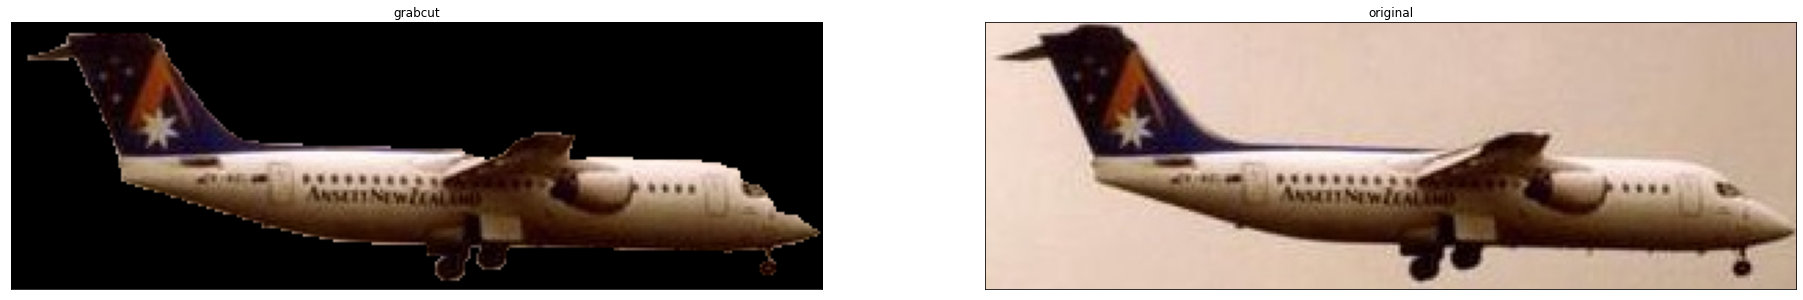

In [18]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(32,16))
plt.subplot(121),  plt.imshow(RGB_img)
plt.title("grabcut"), plt.xticks([]), plt.yticks([])
plt.subplot(122),
plt.imshow(RGB_src)
plt.title("original"), plt.xticks([]), plt.yticks([])

  
plt.show()

In [19]:
img = cv2.imread('/content/gdrive/MyDrive/landscape/00000115_(6).jpg')
RGB_src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

create mask

In [20]:
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel =  np.zeros((1,65),np.float64)
fgdModel =  np.zeros((1,65),np.float64)
x = img.shape[1]
y = img.shape[0]

rectangle: Since we dont know where the foreground objects are located in any given picture, we have to give the full resolution via the parameters x and y

In [21]:
rect = (4,4,x,y)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2  =  np.where((mask==2)|(mask==0),0,1).astype('uint8')
img  = img*mask2[:,:,np.newaxis]

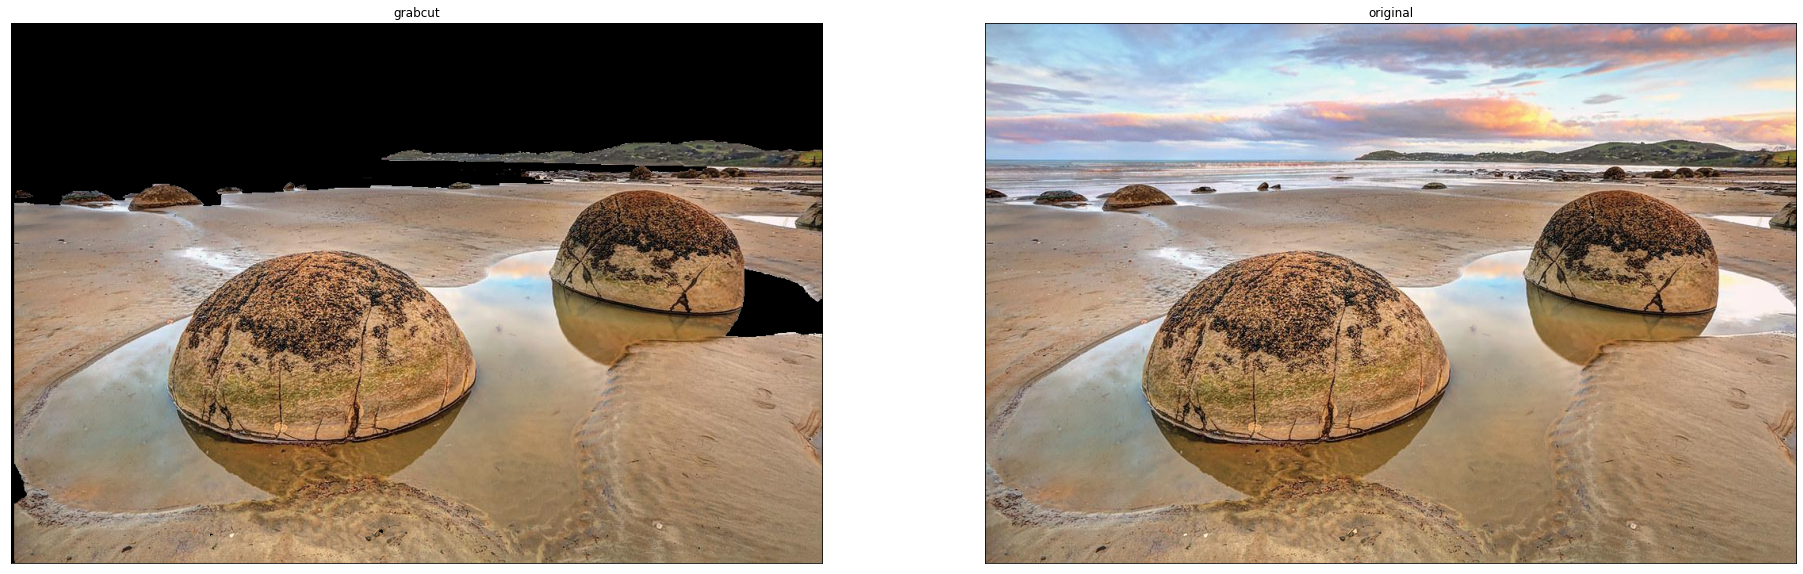

In [22]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(32,16))
plt.subplot(121),  plt.imshow(RGB_img)
plt.title("grabcut"), plt.xticks([]), plt.yticks([])
plt.subplot(122),
plt.imshow(RGB_src)
plt.title("original"), plt.xticks([]), plt.yticks([])

  
plt.show()

create new mask

In [23]:
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel =  np.zeros((1,65),np.float64)
fgdModel =  np.zeros((1,65),np.float64)
x = img.shape[1]
y = img.shape[0]

rectangle: Since we dont know where the foreground objects are located in any given picture, we have to give the full resolution via the parameters x and y

In [24]:
rect = (240,240,x,y)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2  =  np.where((mask==2)|(mask==0),0,1).astype('uint8')
img  = img*mask2[:,:,np.newaxis]

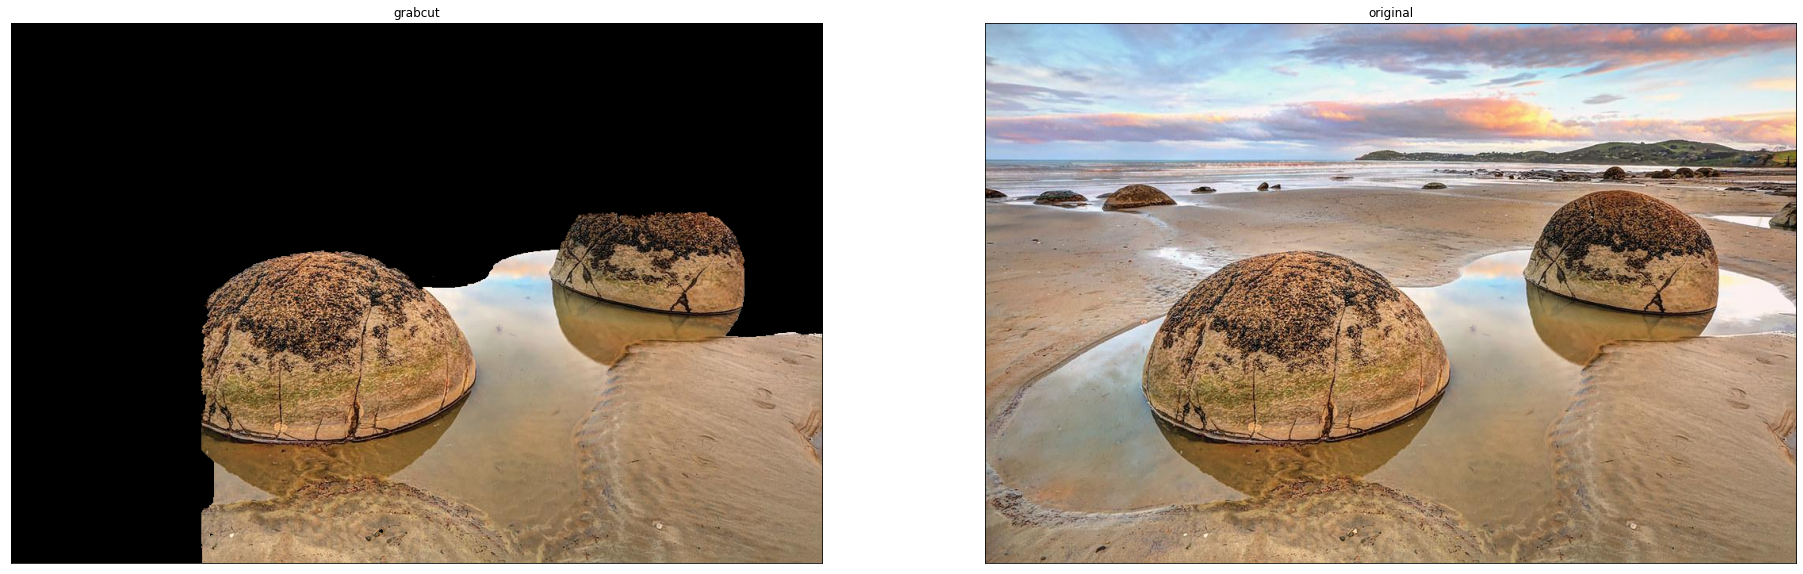

In [25]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(32,16))
plt.subplot(121),  plt.imshow(RGB_img)
plt.title("grabcut"), plt.xticks([]), plt.yticks([])
plt.subplot(122),
plt.imshow(RGB_src)
plt.title("original"), plt.xticks([]), plt.yticks([])

  
plt.show()